<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter5/snippets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version
!wget https://raw.github.com/gnitnaw/Programs/master/Chapter5/survey.csv

Python 3.7.12
--2021-11-18 17:10:56--  https://raw.github.com/gnitnaw/Programs/master/Chapter5/survey.csv
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/gnitnaw/Programs/master/Chapter5/survey.csv [following]
--2021-11-18 17:10:56--  https://raw.githubusercontent.com/gnitnaw/Programs/master/Chapter5/survey.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9482 (9.3K) [text/plain]
Saving to: ‘survey.csv’

survey.csv          100%[===================>]   9.26K  --.-KB/s    in 0s      

2021-11-18 17:10:57 (48.3 MB/s) - ‘su

## Import modules


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula .api import ols
import numpy as np 
print(np.__version__)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1.19.5


## Set random seed

In [ ]:
np.random.seed(12)
#np.random.seed(1200)

## Original program

   Intercept   x1   x2
0        1.0  7.4  1.0
1        1.0  1.2  1.0
2        1.0  3.1  2.0
3        1.0  4.8  2.0
4        1.0  2.8  3.0
5        1.0  6.5  3.0
   Intercept  C(x2)[T.2]  C(x2)[T.3]   x1
0        1.0         0.0         0.0  7.4
1        1.0         0.0         0.0  1.2
2        1.0         1.0         0.0  3.1
3        1.0         1.0         0.0  4.8
4        1.0         0.0         1.0  2.8
5        1.0         0.0         1.0  6.5
   Intercept  C(x2)[T.2]  C(x2)[T.3]   x1  x1:C(x2)[T.2]  x1:C(x2)[T.3]
0        1.0         0.0         0.0  7.4            0.0            0.0
1        1.0         0.0         0.0  1.2            0.0            0.0
2        1.0         1.0         0.0  3.1            3.1            0.0
3        1.0         1.0         0.0  4.8            4.8            0.0
4        1.0         0.0         1.0  2.8            0.0            2.8
5        1.0         0.0         1.0  6.5            0.0            6.5
Intercept    145.777570
shoe           1.

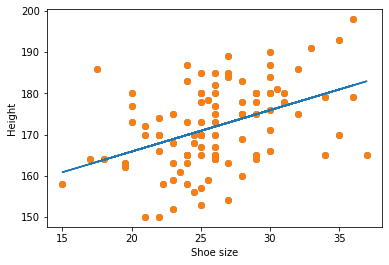

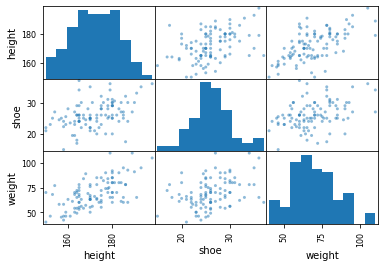

            df       sum_sq      mean_sq          F        PR(>F)
shoe       1.0  1840.467359  1840.467359  30.371310  2.938651e-07
weight     1.0  2596.275747  2596.275747  42.843626  2.816065e-09
Residual  97.0  5878.091294    60.598879        NaN           NaN
            df       sum_sq      mean_sq          F        PR(>F)
weight     1.0  3993.860167  3993.860167  65.906502  1.503553e-12
shoe       1.0   442.882938   442.882938   7.308434  8.104688e-03
Residual  97.0  5878.091294    60.598879        NaN           NaN


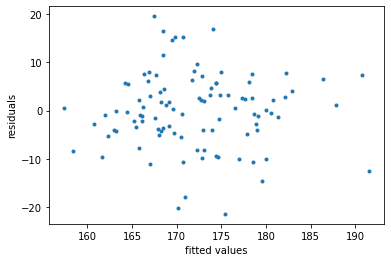

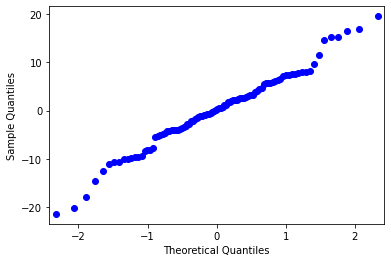

In [ ]:
myData = pd.DataFrame ({'y' : [10 ,9 ,4 ,2 ,4 ,9] ,
'x1' : [7.4 ,1.2 ,3.1 ,4.8 ,2.8 ,6.5] ,
'x2' : [1 ,1 ,2 ,2 ,3 ,3]})
mod = ols("y~x1+x2", data= myData )
mod_matrix = pd.DataFrame (mod.exog , columns =mod. exog_names )
print ( mod_matrix )
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
myData['x2'] = myData['x2'].astype('category')
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
mod2 = ols("y~x1+C(x2)", data= myData )
mod2_matrix = pd.DataFrame(mod2.exog , columns =mod2.exog_names)
print (mod2_matrix)
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
mod3 = ols("y~x1*C(x2)", data= myData )
mod3_matrix = pd. DataFrame (mod3.exog , columns=mod3.exog_names)
print (mod3_matrix )
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
survey = pd.read_csv ('survey.csv')
plt.scatter(survey.shoe , survey.height)
plt.xlabel("Shoe size")
plt.ylabel("Height")
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
model = ols("height~shoe", data=survey ) # define the model
fit = model.fit () #fit the model defined above
b0 , b1 = fit.params
print (fit.params )
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.plot(survey.shoe , b0 + b1* survey.shoe)
plt.scatter(survey.shoe ,survey.height)
plt.xlabel("Shoe size")
plt.ylabel("Height")
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
print (fit.summary ())
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
dir(fit)
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fit.pvalues[1]
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
model = ols("height~shoe+weight", data=survey)
fit = model.fit ()
axes = pd.plotting.scatter_matrix(
survey[['height','shoe','weight']])
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fit.summary()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
table = sm.stats.anova_lm(fit)
print(table)
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
model = ols("height~weight+shoe", data=survey)
fit = model.fit ()
table = sm.stats.anova_lm(fit)
print ( table )
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
x = {'shoe': [30.0] , 'weight': [75.0]} # new input ( dictionary )
pred = fit.get_prediction(x)
pred. summary_frame(alpha =0.05).unstack ()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.plot(fit.fittedvalues ,fit.resid ,'.')
plt.xlabel ("fitted values")
plt.ylabel ("residuals")
sm.qqplot (fit.resid)
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
bwt = sm.datasets.get_rdataset("birthwt","MASS").data
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ftv1 = (bwt['ftv'] >=1).astype (int)
ptl1 = (bwt['ptl'] >=1).astype (int)
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [ ]:
dir(fit)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',
 'mse_mode